In [1]:
using LinearAlgebra
using Plots
import StatsBase
include("src/Trajectories.jl")
using .QuantumTrajectories

In [6]:
################### Qubit decay example ######################
#### 1. Create the system instance
gamma = 1.5
n = 1
gamma1 = (n+1)*gamma 
gamma2 = (n)*gamma
sigma_m = [[0.0+0im, 0]  [1, 0]]
sigma_p = [[0.0+0im, 1]  [0, 0]]
sys = System( zeros(ComplexF64, 2, 2), # Hamiltonian
    [sqrt(gamma1)*sigma_m, sqrt(gamma2)*sigma_p ]) #Jump Operators
#### 2. Create the simulation parameters instance
psi0 = zeros(ComplexF64, 2)
psi0[2] = 1 # Initial condition
simulparams = SimulParameters(psi0,
    5.0, # Final time. Set very long so that all trajectories jump
    10, # seed
    1, # Number of trajectories
    10_000, # Number of samples in the finegrid
    10, # Multiplier to use in the fine grid
    1e-3 # Tolerance for passing Dark state test
) 
println(sys)

System(NLEVELS=2
NCHANNELS=2
H=ComplexF64[0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im]
Ls=Matrix{ComplexF64}[[0.0 + 0.0im 1.7320508075688772 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im], [0.0 + 0.0im 0.0 + 0.0im; 1.224744871391589 + 0.0im 0.0 + 0.0im]]
J=ComplexF64[1.4999999999999998 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 2.9999999999999996 + 0.0im])
Heff=ComplexF64[0.0 - 0.7499999999999999im 0.0 + 0.0im; 0.0 + 0.0im 0.0 - 1.4999999999999998im])


In [7]:
@time begin 
    data = run_trajectories(sys, simulparams)
end 

  0.080313 seconds (540.79 k allocations: 43.175 MiB, 31.70% gc time, 5.97% compilation time)


1-element Vector{Main.QuantumTrajectories.Trajectory}:
 Main.QuantumTrajectories.Trajectory([0.285028502850285, 1.6051605160516051, 2.2602260226022604, 3.9403940394039405, 4.08040804080408, 4.475447544754475, 4.655465546554655, 4.675467546754676, 4.725472547254726], Vector{ComplexF64}[[1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im]], [1, 2, 1, 2, 1, 2, 1, 2, 1])

In [8]:
data[1]

Main.QuantumTrajectories.Trajectory([0.285028502850285, 1.6051605160516051, 2.2602260226022604, 3.9403940394039405, 4.08040804080408, 4.475447544754475, 4.655465546554655, 4.675467546754676, 4.725472547254726], Vector{ComplexF64}[[1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im], [1.0 + 0.0im, 0.0 + 0.0im]], [1, 2, 1, 2, 1, 2, 1, 2, 1])

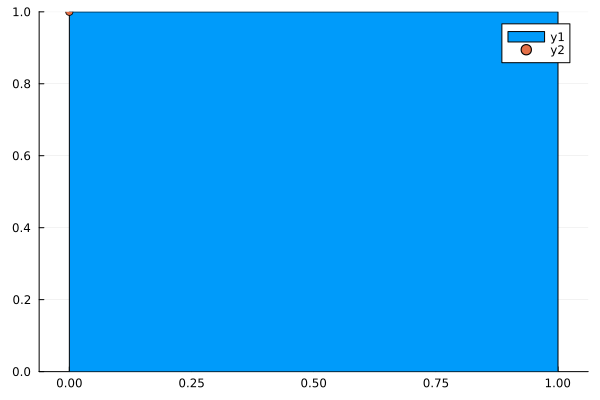

In [5]:
times = [traj.times[1] for traj in data if !isempty(traj.times)]
histogram(times, normalize=:pdf)
scatter!(times, exp.(-times))